git clone https://github.com/RyanP-Hoang/cs131.git

**Objective**

Learn how to train a linear regression model and show statistical measures using proper visualization with Python.

**Tasks**

In this assignment, you will analyze the Wine Quality dataset (https://archive.ics.uci.edu/dataset/186/wine+qualityLinks to an external site.). Complete the following tasks ONLY FOR "WHITE" WINE data points.

**Preparation**

In [2]:
!pip3 install -U ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
white_wine = pd.read_csv('winequality-white.csv', sep = ';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**1. For each feature and the target variables, obtain the mean, standard deviation, min, max, and 25/50/75% percentiles. (Show a table.)**

In [5]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**2. Illustrate the correlation matrix of all features and the target.**

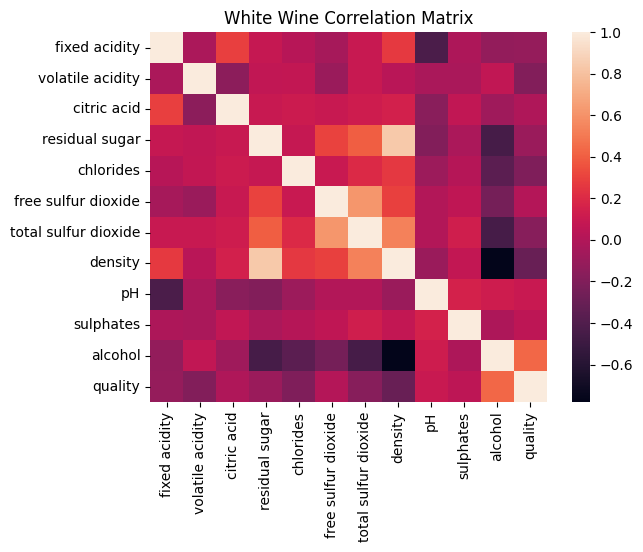

In [7]:
sns.heatmap(white_wine.corr())
plt.title('White Wine Correlation Matrix')
plt.show()

**3. Plot a histogram of the target value (quality).**

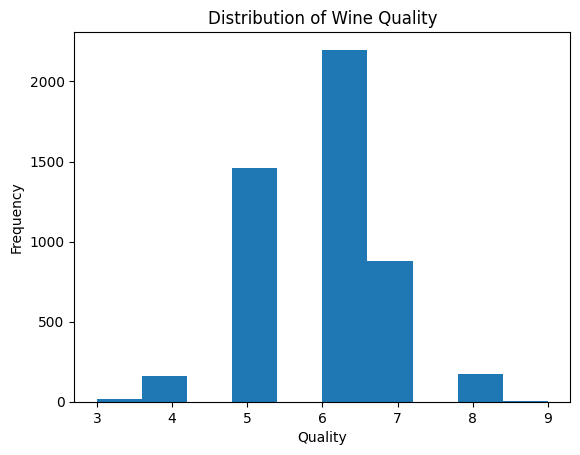

In [15]:
plt.hist(white_wine['quality'])
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()

**4. Illustrate the violin plots of all features. Make sure that each plot is visible.**

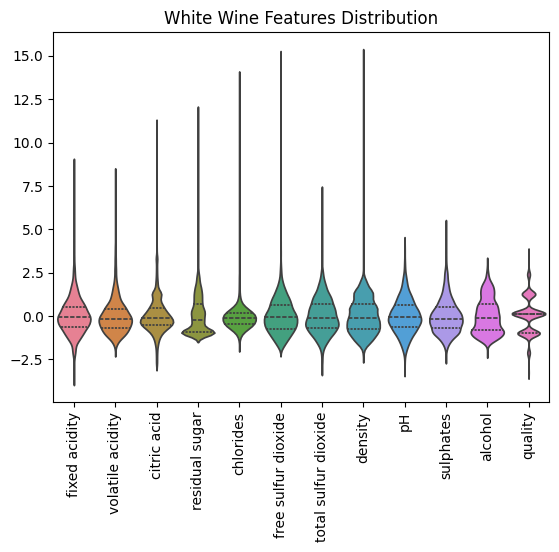

In [19]:
wine_data_standardized = (white_wine - white_wine.mean()) / white_wine.std()

sns.violinplot(data=wine_data_standardized, inner='quartile')
plt.xticks(rotation=90)
plt.title('White Wine Features Distribution')
plt.show()

**5. Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.**

Intercept = 2.582009399174922
Coefficient = 0.3134693019118325
RMSE = 0.7971284628753889
R^2 = 0.1897253327492563


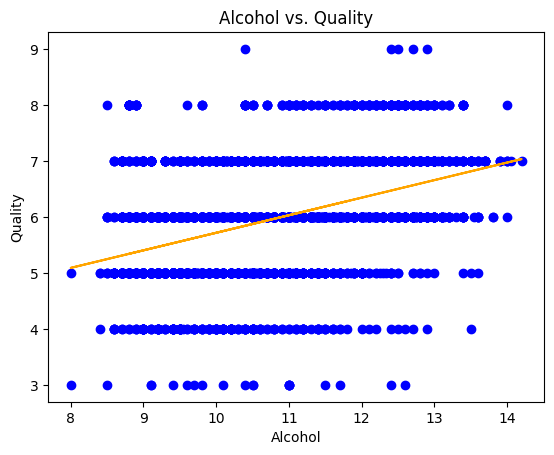

In [30]:
plt.scatter(x=white_wine['alcohol'], y=white_wine['quality'], color='blue')
model = LinearRegression()
model.fit(white_wine[['alcohol']], white_wine['quality'])

intercept = model.intercept_
coefficient = model.coef_[0]
fitted = model.predict(white_wine[['alcohol']])
rmse = np.sqrt(mean_squared_error(white_wine['quality'], fitted))
r2 = r2_score(white_wine['quality'], fitted)

print(f"Intercept = {intercept}")
print(f"Coefficient = {coefficient}")
print(f"RMSE = {rmse}")
print(f"R^2 = {r2}")

plt.plot(white_wine['alcohol'], fitted, color='orange',label='Regression line')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs. Quality')
plt.show()

**6. Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2.**

Intercept = -36.498611307001624
Coefficients = [-2.07211594  0.39889282 38.99188669]
RMSE = 0.76848726881725
R^2 = 0.24690635619896484


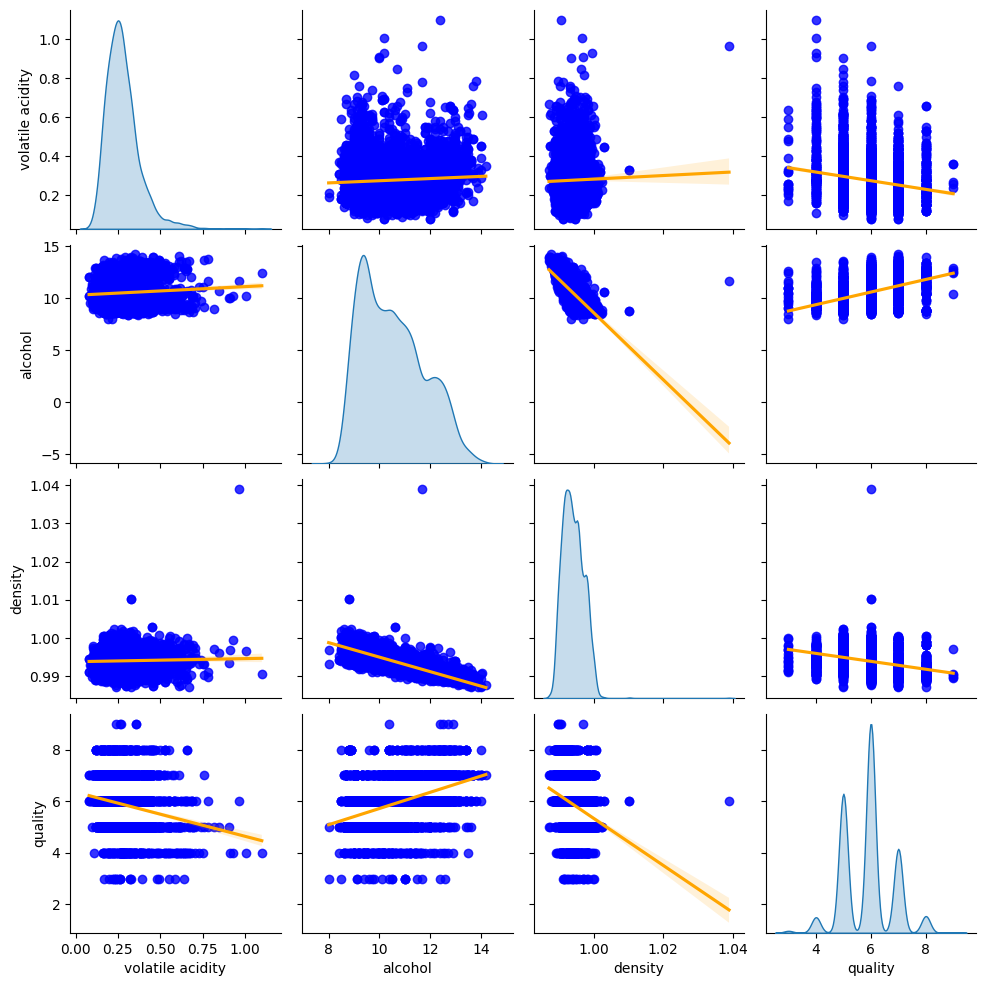

In [31]:
model = LinearRegression()
model.fit(white_wine[['volatile acidity', 'alcohol', 'density']], white_wine['quality'])

intercept = model.intercept_
coefficients = model.coef_
fitted = model.predict(white_wine[['volatile acidity', 'alcohol', 'density']])
rmse = np.sqrt(mean_squared_error(white_wine['quality'], fitted))
r2 = r2_score(white_wine['quality'], fitted)

print(f'Intercept = {intercept}')
print(f'Coefficients = {coefficients}')
print(f'RMSE = {rmse}')
print(f'R^2 = {r2}')

relevant_columns = ['volatile acidity', 'alcohol', 'density', 'quality']
sns.pairplot(white_wine[relevant_columns], kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'color': 'blue'}, 'line_kws': {'color': 'orange'}})